In [2]:
#imports go here

from sage.plot.polygon import Polygon
from sage.plot.colors import rainbow

In [9]:
"""
There are two problems we want to solve:
1) How large of a supertile must we compute to find all of the 1-collared prototiles?
2) How can we generate all of the 1-collared prototiles from a large enough subsection of the tiling?

Also, we want to be able to do this for other types of tilings, not just those that use vertical/horizontal
lines to construct the prototiles. For instance, https://tilings.math.uni-bielefeld.de/substitution/binary/
uses rhombuses with internal angles either in {pi/5, 3pi/5} or {2pi/5, 4pi/5}

For now, the focus will be on representing tilings as a collection of objects rather than as a graphics
object, as this will save computing power and the resulting collections can just be graphed after being
generated. Once we can generate large supertile objects, we can start to write functions that generate
the possible collars of a set of prototiles.
"""

class ChairTile:
    
    # We define a supertile by:
    # level, i.e. n where the supertile is L_n
    # orientation as a multiple of pi describing rotation around its center
    # origin, describing where to place this tile when moving up a level. The origin is the point that stays fixed
    #     when moving up a level.
    def __init__(self, level: int, orientation: RR, origin: vector):
        self.points = []
        self.level = level
        self.orientation = orientation
        self.origin = origin

        if (level < 0):
            raise Exception("Level must be a non-negative integer.")
        
        if (level == 0):
            self.points = [vector((0 + origin[0], 0 + origin[1])), 
                           vector((2 + origin[0], 0 + origin[1])), 
                           vector((2 + origin[0], 1 + origin[1])), 
                           vector((1 + origin[0], 1 + origin[1])), 
                           vector((1 + origin[0], 2 + origin[1])), 
                           vector((0 + origin[0], 2 + origin[1]))]
            self.rotate_tile(self.origin, self.orientation)

        else:
            # If this is a supertile, we consider it to be the collection of all the prototiles that make it up
            self.subtiles = []
            R = rotation_matrix(self.orientation)
            
            st_1 = ChairTile(level - 1, self.orientation, origin)
            st_2 = ChairTile(level - 1, self.orientation, origin + R*vector((2**(level - 1), 2**(level - 1))))
            st_3 = ChairTile(level - 1, self.orientation + pi/2, origin + R*vector ((2** (level + 1), 0)))
            st_4 = ChairTile(level - 1, self.orientation + 3*pi/2, origin + R*vector((0, 2** (level + 1))))

            self.subtiles.append(st_1)
            self.subtiles.append(st_2)
            self.subtiles.append(st_3)
            self.subtiles.append(st_4)

        

    # Rotates a tile around center by theta degrees, clockwise
    def rotate_tile(self, center, theta):
        if (theta == 0):
            return
        R = rotation_matrix(theta)
        pts = [R*vector((self.points[i][0]-center[0],self.points[i][1]-center[1])) for i in range(len(self.points))]
        self.points = [(pts[i][0]+center[0],pts[i][1]+center[1]) for i in range(len(self.points))]
    
    def iterate_subtiles(self):
        if self.level >> 0:
            for s in self.subtiles:
                
    
    # Graphs all tiles in supertile recursively
    def graph(self):
        P = Graphics()
        if self.level >> 0:
            for s in self.subtiles:
                P += s.graph()
        else:
            P += polygon(self.points, fill=False)
        
        return P
    
    # Given a supertile, finds the relevant verticies on the inner edges
    # these vertices will be used to find the tiles on the growing edge of the supertile
    # i.e. the tiles for which we can find a 1-collar!
    # uh this only works for orientation = 0 supertiles, whoops
    def find_corner_points(self):
        self.corner_points = []
        
        # There is the vertical edge, and the horizontal edge.
        # We will order the points from the topmost on the vertical
        # edge, all the way around to the rightmost on the horizontal edge
        
        # Number of vertices on each edge, minus
        # the two annoying innermost corner points
        num = 2**(self.level-1)
        
        # Starts at top point of the vertical edge
        x, y = (2**(self.level), 2**(self.level+1))
        
        # Iterate through vertical edge
        for n in range(0, num):
            self.corner_points.append((self.origin[0] + x, self.origin[1] + y - 2*n))
        
        # Add on the two annoying innermost corner vertices!
        self.corner_points.append((self.origin[0] + 2**(self.level), self.origin[1] + 2**(self.level) + 1))
        self.corner_points.append((self.origin[0] + 2**(self.level) + 1, self.origin[1] + 2**(self.level)))
        
        # Now, we are on the horizonal edge!
        x, y = (2**(self.level) + 2, 2**(self.level))
        
        # Iterate through vertices on horizontal edge
        for m in range(0, num):
            self.corner_points.append((self.origin[0] + x + 2*n, self.origin[1] + y))
        
        # Done!
        return
    
# quickly get rotation matrix for an angle, just for convenience
def rotation_matrix(theta):
    R = matrix(2,2,[cos(theta),-sin(theta),sin(theta),cos(theta)])
    return R


# Not sure if I should include the next two functions in the class or not...

# Ok so the plan here is that I iterate through every point in self.corner_points
# and I search all tiles in the supertile and the supertile + (2**level, 2**level)
# and see which ones have said point. Then, I search my narrowed down list for the tiles
# that ALSO have the next point in my self.corner_points list. This way, I find the tiles that
# share an edge with the corner edge. This is the most efficient way I came up with, not sure if
# there is a better way.
def find_tiles(supertile: ChairTile):
    return


# For each tile, we can run this function to find it's 1-collar
def find_collar(supertile: ChairTile, tile: ChairTile)
    return
                
        

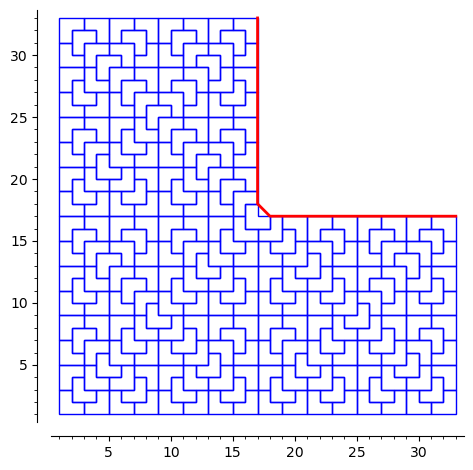

In [16]:
p = ChairTile(4, 0, vector((1,1)))
p.find_corner_points()
cp = line(p.corner_points, thickness = 2, rgbcolor = (1, 0, 0))
P = p.graph() + cp
show(P)
